# Image Detection on FER2013 with Mini-Xception

A lot of the following code and ideas are obtained from:
Octavio Arriaga, Matias Valdenegro-Toro and Paul Plöger
Github: https://github.com/oarriaga


In [1]:
# !pip3 install Pillow==2.6.0

In [2]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau 
from keras.preprocessing.image import ImageDataGenerator
from keras import backend
import tensorflow as tf

from cnn import mini_XCEPTION
from utils.datasets import DataManager
from utils.datasets import split_data
from utils.preprocessor import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline

backend.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
# parameters
batch_size = 32
num_epochs = 10000
input_shape = (64, 64, 1)
validation_split = .2
verbose = 1
num_classes = 7
patience = 50
base_path = '/data/emotion_models/'

IM_WIDTH, IM_HEIGHT = 64, 64 #fixed size for InceptionV3
NB_EPOCHS = 100
BAT_SIZE = 32
FC_SIZE = 1024
NB_IV3_LAYERS_TO_FREEZE = 172


In [4]:
# data generator

# model parameters/compilation
model = mini_XCEPTION(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 62, 62, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 62, 62, 8)    0           batch_normalization_1[0][0]      
_____________________________________

In [5]:
dataset_name = 'fer2013'

In [6]:
log_file_path = base_path + dataset_name + '_emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(patience/4), verbose=1)
trained_models_path = base_path + dataset_name + '_mini_XCEPTION'
model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1, save_best_only=True)
callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr, TensorBoard("/data/tf_log/minixception")]

In [ ]:
train_data_dir = "/data/Training"

#### Visualize pictures


In [ ]:

data_generator = ImageDataGenerator(
                        preprocessing_function=preprocess_input,
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        validation_split=0.2)
    
train_generator = data_generator.flow_from_directory(
train_data_dir,
target_size=(IM_WIDTH, IM_HEIGHT),
batch_size=BAT_SIZE,
subset='training',
color_mode="grayscale")

validation_generator = data_generator.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(IM_WIDTH, IM_HEIGHT),
    batch_size=BAT_SIZE,
    subset='validation',
color_mode="grayscale")


Found 22968 images belonging to 7 classes.
Found 5740 images belonging to 7 classes.


(32, 64, 64, 1)
(64, 64, 1)


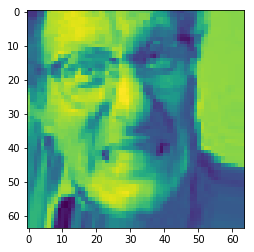

In [ ]:
x,y = train_generator.next()
# for i in range(0,1):
#     image = x[i]
#     plt.imshow(image.transpose(2,1,0))
#     plt.show()
print(x.shape)
image = x[2]
print(image.shape)
plt.imshow(image.reshape(IM_WIDTH, IM_HEIGHT))
plt.show()

In [ ]:
import time
start = time. time()


model.fit_generator( 
    train_generator,
    steps_per_epoch = train_generator.samples // BAT_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BAT_SIZE,
    epochs=NB_EPOCHS, verbose=1, callbacks=callbacks)

end = time. time()
print(end - start)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
717/717 [==============================] - 44s 62ms/step - loss: 1.8036 - acc: 0.3141 - val_loss: 2.1778 - val_acc: 0.2870

Epoch 00001: val_loss improved from inf to 2.17785, saving model to /data/emotion_models/fer2013_mini_XCEPTION.01-0.29.hdf5
Epoch 2/100
717/717 [==============================] - 42s 58ms/step - loss: 1.5690 - acc: 0.4086 - val_loss: 1.8250 - val_acc: 0.3663

Epoch 00002: val_loss improved from 2.17785 to 1.82502, saving model to /data/emotion_models/fer2013_mini_XCEPTION.02-0.37.hdf5
Epoch 3/100
717/717 [==============================] - 42s 59ms/step - loss: 1.4372 - acc: 0.4611 - val_loss: 1.4942 - val_acc: 0.4485

Epoch 00003: val_loss improved from 1.82502 to 1.49418, saving model to /data/emotion_models/fer2013_mini_XCEPTION.03-0.45.hdf5
Epoch 4/100
717/717 [==============================] - 42s 59ms/step - loss: 1.3713 - acc: 0.4855 - val_loss: 1.3352 - val_acc: 0.5060

Epoch 00004: val_loss improv